In [1]:
#Load packages

from scipy.stats import norm
from scipy.stats import t
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Import cleaned df from EDA notebook

df = pd.read_csv('post_eda_data.csv')

In [3]:
df.dtypes

#Categorical columns are Fuel, City, County, Zip Code, Year
#We can drop city and county columns because the info is technically in zip code already; zip codes are unique 
#   whereas city names may not be;

#Zip code is a categorical column but in int format; Too many levels 

#Fuel types and Year can easily be converted into dummies; not too many levels


Unnamed: 0.1        int64
Unnamed: 0          int64
Zip Code            int64
Year                int64
Fuel               object
Vehicles            int64
Vehicles Total      int64
Vehicle Ratio     float64
City               object
County             object
Returns             int64
CA AGI              int64
AGI_calc          float64
dtype: object

In [4]:
#Drop city and county columns  and unnamed columns

df.drop(columns = ['City','County','Unnamed: 0.1','Unnamed: 0'],inplace = True)

In [5]:
df

,Zip Code,Year,Fuel,Vehicles,Vehicles Total,Vehicle Ratio,Returns,CA AGI,AGI_calc
0,90001,2019,Battery Electric,21,34608,0.000607,21515,704531451,32746.05861
1,90001,2019,Diesel and Diesel Hybrid,804,34608,0.023232,21515,704531451,32746.05861
2,90001,2019,Flex-Fuel,1247,34608,0.036032,21515,704531451,32746.05861
3,90001,2019,Gasoline,31934,34608,0.922735,21515,704531451,32746.05861
4,90001,2019,Hybrid Gasoline,531,34608,0.015343,21515,704531451,32746.05861
...,...,...,...,...,...,...,...,...,...
27698,96162,2020,Battery Electric,1,1179,0.000848,1167,93932710,80490.75407
27699,96162,2020,Diesel and Diesel Hybrid,88,1179,0.074640,1167,93932710,80490.75407
27700,96162,2020,Flex-Fuel,44,1179,0.037320,1167,93932710,80490.75407
27701,96162,2020,Gasoline,1027,1179,0.871077,1167,93932710,80490.75407


In [6]:
df['Fuel'].nunique()

8

In [7]:
#Too many levels in this categorical variable
df['Zip Code'].nunique()

2201

<Axes: >

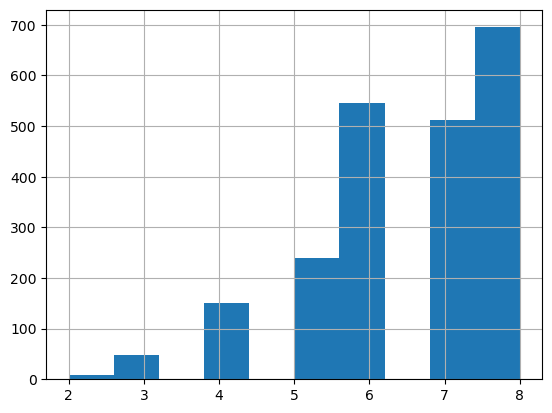

In [8]:
#Histogram to see how many zip codes have how many different fuel types represented
# Most zip codes have at least 6 unique fuel types

#Can we drop the zip codes with fewer unique fuels to have fewer levels? Downside is we lose information about
# zip codes that only have a couple fuel types (likely smaller zip codes) but they may contain useful information
# to build a model ie. predicting fuel ratios for a similar smaller zip code

df.groupby('Zip Code')['Fuel'].nunique().hist()

In [9]:
sum(df.groupby('Zip Code')['Fuel'].nunique() >5)

1753

In [10]:
df.groupby('Zip Code')['Fuel'].nunique().sort_values()

Zip Code
90074    2
93765    2
90306    2
93064    2
93718    2
        ..
94109    8
94110    8
94112    8
93110    8
90001    8
Name: Fuel, Length: 2201, dtype: int64

In [11]:
#There's not an overwhelming stratification of just 1 or 2 fuel types among zip codes with less unique fuel types

df.groupby('Zip Code').filter(lambda x : x['Fuel'].nunique() < 5)['Fuel'].value_counts()

Gasoline                    396
Diesel and Diesel Hybrid    364
Flex-Fuel                   364
Hybrid Gasoline             285
Plug-in Hybrid               11
Battery Electric              8
Natural Gas                   1
Name: Fuel, dtype: int64

In [12]:
#Zip codes: Too many levels to use one hot encoding (would create too many columns); To avoid this, 
#for now we will try using Label encoding even though it creates false premise of certain zip codes 
# being 'prioritized' over others

In [13]:
#Columns to get dummies:
dum_cols = ['Fuel','Year']
#Columns to label encode:
label_cols = ['Zip Code']
#Columns to scale: 
scale_cols = ['Vehicles','Vehicles Total','Vehicle Ratio','Returns','CA AGI','AGI_calc']

In [14]:
scaled_df = df

# Making a Scaler object
scaler = preprocessing.StandardScaler()

# Fitting data to the scaler object
scaler.fit(df[scale_cols])

#Transforming numerical columns in data to scaled versions
scaled_df[scale_cols]= scaler.transform(df[scale_cols])

scaled_df

,Zip Code,Year,Fuel,Vehicles,Vehicles Total,Vehicle Ratio,Returns,CA AGI,AGI_calc
0,90001,2019,Battery Electric,-0.285489,1.152147,-0.528071,1.186366,0.042574,-1.185122
1,90001,2019,Diesel and Diesel Hybrid,-0.171329,1.152147,-0.451477,1.186366,0.042574,-1.185122
2,90001,2019,Flex-Fuel,-0.106740,1.152147,-0.408143,1.186366,0.042574,-1.185122
3,90001,2019,Gasoline,4.367398,1.152147,2.593691,1.186366,0.042574,-1.185122
4,90001,2019,Hybrid Gasoline,-0.211132,1.152147,-0.478183,1.186366,0.042574,-1.185122
...,...,...,...,...,...,...,...,...,...
27698,96162,2020,Battery Electric,-0.288405,-0.814501,-0.527254,-0.769733,-0.687259,0.288636
27699,96162,2020,Diesel and Diesel Hybrid,-0.275721,-0.814501,-0.277442,-0.769733,-0.687259,0.288636
27700,96162,2020,Flex-Fuel,-0.282136,-0.814501,-0.403784,-0.769733,-0.687259,0.288636
27701,96162,2020,Gasoline,-0.138815,-0.814501,2.418810,-0.769733,-0.687259,0.288636


In [15]:
scaled_df.describe()

,Zip Code,Year,Vehicles,Vehicles Total,Vehicle Ratio,Returns,CA AGI,AGI_calc
count,27703.000000,27703.000000,2.770300e+04,2.770300e+04,2.770300e+04,2.770300e+04,2.770300e+04,2.770300e+04
mean,93424.362740,2019.495831,-1.231132e-17,-4.103774e-17,2.872641e-17,-8.207547e-17,-8.207547e-18,-1.066981e-16
std,1802.153831,0.499992,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,90001.000000,2019.000000,-2.884052e-01,-8.837442e-01,-5.300781e-01,-8.818236e-01,-7.995327e-01,-2.193435e+00
25%,92083.000000,2019.000000,-2.872388e-01,-8.447983e-01,-5.126427e-01,-8.417365e-01,-7.667050e-01,-7.342341e-01
50%,93401.000000,2019.000000,-2.748459e-01,-4.238654e-01,-4.408296e-01,-4.838360e-01,-4.918460e-01,-2.476268e-01
75%,95213.000000,2020.000000,-1.975724e-01,6.640298e-01,-2.961727e-01,6.882087e-01,5.383041e-01,5.219071e-01
max,96162.000000,2020.000000,1.660257e+01,6.673810e+00,2.855264e+00,3.873359e+00,6.144891e+00,3.220693e+00


In [16]:
df_dum_cols = df[dum_cols]
df_dum_cols

,Fuel,Year
0,Battery Electric,2019
1,Diesel and Diesel Hybrid,2019
2,Flex-Fuel,2019
3,Gasoline,2019
4,Hybrid Gasoline,2019
...,...,...
27698,Battery Electric,2020
27699,Diesel and Diesel Hybrid,2020
27700,Flex-Fuel,2020
27701,Gasoline,2020


In [17]:
dummy_df = pd.get_dummies(scaled_df,columns = dum_cols)

In [18]:
dummy_df

,Zip Code,Vehicles,Vehicles Total,Vehicle Ratio,Returns,CA AGI,AGI_calc,Fuel_Battery Electric,Fuel_Diesel and Diesel Hybrid,Fuel_Flex-Fuel,Fuel_Gasoline,Fuel_Hybrid Gasoline,Fuel_Hydrogen Fuel Cell,Fuel_Natural Gas,Fuel_Plug-in Hybrid,Year_2019,Year_2020
0,90001,-0.285489,1.152147,-0.528071,1.186366,0.042574,-1.185122,1,0,0,0,0,0,0,0,1,0
1,90001,-0.171329,1.152147,-0.451477,1.186366,0.042574,-1.185122,0,1,0,0,0,0,0,0,1,0
2,90001,-0.106740,1.152147,-0.408143,1.186366,0.042574,-1.185122,0,0,1,0,0,0,0,0,1,0
3,90001,4.367398,1.152147,2.593691,1.186366,0.042574,-1.185122,0,0,0,1,0,0,0,0,1,0
4,90001,-0.211132,1.152147,-0.478183,1.186366,0.042574,-1.185122,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27698,96162,-0.288405,-0.814501,-0.527254,-0.769733,-0.687259,0.288636,1,0,0,0,0,0,0,0,0,1
27699,96162,-0.275721,-0.814501,-0.277442,-0.769733,-0.687259,0.288636,0,1,0,0,0,0,0,0,0,1
27700,96162,-0.282136,-0.814501,-0.403784,-0.769733,-0.687259,0.288636,0,0,1,0,0,0,0,0,0,1
27701,96162,-0.138815,-0.814501,2.418810,-0.769733,-0.687259,0.288636,0,0,0,1,0,0,0,0,0,1


In [19]:
#Create a label encoder object
label_encoder = preprocessing.LabelEncoder() 

#Use label encoding on Zip Code column
dummy_df['Zip Code']= label_encoder.fit_transform(dummy_df['Zip Code']) 
dummy_df['Zip Code'].describe()

count    27703.000000
mean      1067.479804
std        631.841026
min          0.000000
25%        512.000000
50%       1051.000000
75%       1607.000000
max       2200.000000
Name: Zip Code, dtype: float64

In [20]:
dummy_df

,Zip Code,Vehicles,Vehicles Total,Vehicle Ratio,Returns,CA AGI,AGI_calc,Fuel_Battery Electric,Fuel_Diesel and Diesel Hybrid,Fuel_Flex-Fuel,Fuel_Gasoline,Fuel_Hybrid Gasoline,Fuel_Hydrogen Fuel Cell,Fuel_Natural Gas,Fuel_Plug-in Hybrid,Year_2019,Year_2020
0,0,-0.285489,1.152147,-0.528071,1.186366,0.042574,-1.185122,1,0,0,0,0,0,0,0,1,0
1,0,-0.171329,1.152147,-0.451477,1.186366,0.042574,-1.185122,0,1,0,0,0,0,0,0,1,0
2,0,-0.106740,1.152147,-0.408143,1.186366,0.042574,-1.185122,0,0,1,0,0,0,0,0,1,0
3,0,4.367398,1.152147,2.593691,1.186366,0.042574,-1.185122,0,0,0,1,0,0,0,0,1,0
4,0,-0.211132,1.152147,-0.478183,1.186366,0.042574,-1.185122,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27698,2200,-0.288405,-0.814501,-0.527254,-0.769733,-0.687259,0.288636,1,0,0,0,0,0,0,0,0,1
27699,2200,-0.275721,-0.814501,-0.277442,-0.769733,-0.687259,0.288636,0,1,0,0,0,0,0,0,0,1
27700,2200,-0.282136,-0.814501,-0.403784,-0.769733,-0.687259,0.288636,0,0,1,0,0,0,0,0,0,1
27701,2200,-0.138815,-0.814501,2.418810,-0.769733,-0.687259,0.288636,0,0,0,1,0,0,0,0,0,1


In [26]:
df_processed = dummy_df
df_processed.shape

(27703, 17)

In [22]:
df_processed.dtypes

Zip Code                           int64
Vehicles                         float64
Vehicles Total                   float64
Vehicle Ratio                    float64
Returns                          float64
CA AGI                           float64
AGI_calc                         float64
Fuel_Battery Electric              uint8
Fuel_Diesel and Diesel Hybrid      uint8
Fuel_Flex-Fuel                     uint8
Fuel_Gasoline                      uint8
Fuel_Hybrid Gasoline               uint8
Fuel_Hydrogen Fuel Cell            uint8
Fuel_Natural Gas                   uint8
Fuel_Plug-in Hybrid                uint8
Year_2019                          uint8
Year_2020                          uint8
dtype: object

In [23]:
#Create new csv file of the scaled and transformed data ready for modeling

df_processed.to_csv('pre_processed_data.csv')

In [24]:
#Split data into training and testing splits
X = df_processed.drop('Vehicle Ratio',axis = 1)
y = df_processed['Vehicle Ratio']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state = 28)

In [25]:
X_train.shape

(20777, 16)